<h1>Practical Data Science Project 2</h1>
<h3>Done by Lionel Ng & Zuo Lin</h3>
<br>
<p>The goal of our project is to use the historical prices of S&P companies under the New York Stock Exchange to identify undervalued stocks using prediction machine learning algorithms such as regression and LSTM (best algorithm to be determined after exploration). This task is heavily related to the finance domain, which the both of us are highly interested in. We wish to harness the power of machine learning to bring value to financial institutions and investors by building a model that is highly effective in identifying any potential stocks to invest in. The T P E for our project is:</p>

T  To identify undervalued stocks with high investment potential
<br>
P Overall investment gains when compared to real time data
<br>
E Using fundamentals about the firms such as Net Cash Flow, Liabilities, Long term debt & etc as well as historical prices
    
<b>Our approach:</b>


<b>Key results found:</b>

<b>Assumptions made:</b>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import os

np.warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/prices-split-adjusted.csv')
df2 = pd.read_csv('data/securities.csv')
df3 = pd.read_csv('data/fundamentals.csv')

In [3]:
df.groupby(['symbol']).count()

,date,open,close,low,high,volume
symbol,,,,,,
A,1762,1762,1762,1762,1762,1762
AAL,1762,1762,1762,1762,1762,1762
AAP,1762,1762,1762,1762,1762,1762
AAPL,1762,1762,1762,1762,1762,1762
ABBV,1008,1008,1008,1008,1008,1008
...,...,...,...,...,...,...
YHOO,1762,1762,1762,1762,1762,1762
YUM,1762,1762,1762,1762,1762,1762
ZBH,1762,1762,1762,1762,1762,1762


<h2>Data Exploration</h2>
<br>
We first started the project by doing some exploratory data analysis. Since our data has already been pre-processed into numerical variables with NA and empty fields removed, we did not have to do much pre-processing for the dataset


In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


The first dataframe (df) indicates the daily prices.

In [5]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [6]:
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])


number of different stocks:  501
['CTSH', 'ETFC', 'NTRS', 'CCL', 'CAT', 'LMT', 'FISV', 'PWR', 'PPG', 'ALK']


Based on the summary statistics, there are more than 800,000 rows of data available in the dataset

In [7]:
df2.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


Df2 shows general description of each company with division on sectors

In [8]:
df3.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


Df3 are metrics extracted from annual SEC 10K fillings (2012-2016), based on research some of the variables provided are used as popular fundamental indicators for stock price analysis.

In [9]:
data = df
NA_col = data.isnull().sum()
print(NA_col)

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


In [10]:
data2 = df2
NA_col = data2.isnull().sum()
print(NA_col)

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64


In [11]:
data3 = df3
NA_col = data3.isnull().sum()
print(NA_col)

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64


From the 3 results, we can conclude that the amount of null results in all 3 datasets are negligible.

In [12]:
corr = df.corr()
print(corr)

            open     close       low      high    volume
open    1.000000  0.999845  0.999914  0.999928 -0.132526
close   0.999845  1.000000  0.999926  0.999925 -0.132675
low     0.999914  0.999926  1.000000  0.999889 -0.133087
high    0.999928  0.999925  0.999889  1.000000 -0.132168
volume -0.132526 -0.132675 -0.133087 -0.132168  1.000000


In [13]:
df = data.loc[data['symbol']=='AAPL']
df.drop('symbol', axis=1, inplace=True)
print(np.shape(df))

(1762, 6)


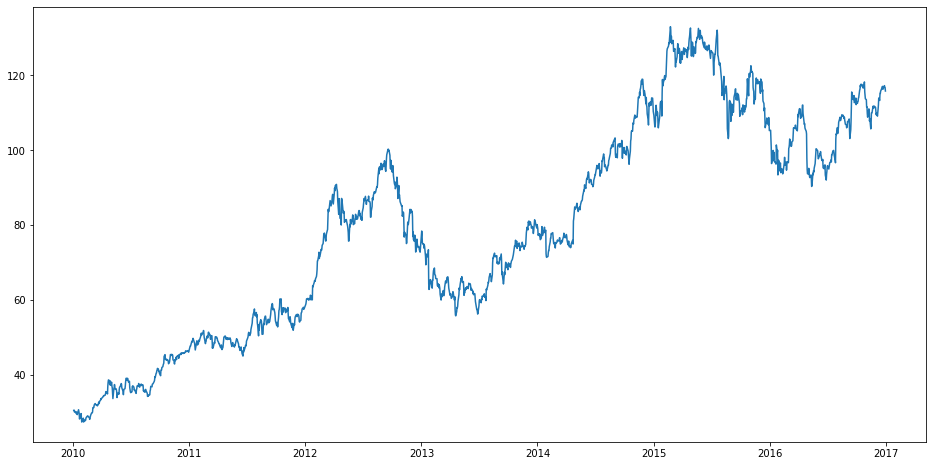

In [14]:
# changing the index to date

#setting index as date
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

#plot
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price history')

In [15]:
Min_date = df.index.min()
Max_date = df.index.max()
print ("First date is",Min_date)
print ("Last date is",Max_date)
print (Max_date - Min_date)

First date is 2010-01-04 00:00:00
Last date is 2016-12-30 00:00:00
2552 days 00:00:00


In [16]:
# df['date'] = df.index
# df.head()

<h2>Initial baseline model exploration</h2>
<br>
After our initial exploratory data analysis, we decided to explore the various algorithms we have found through our research to see the effectiveness of each baseline models. The models that we have tried are linear regression, moving average, logistic regression, ARIMA, autoregression & genetic algorithm

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [18]:
# Creating new column 
num = 30 # forcasting 30 days ahead
df['label'] = df['close'].shift(-num) # forcasting close column
                                     
print(df.shape)

(1762, 6)


In [19]:
Data = df.drop(['label'],axis=1)
X = Data.values
X = preprocessing.scale(X)
X = X[:-num]

df.dropna(inplace=True)
Target = df.label
y = Target.values

print(np.shape(X), np.shape(y))

(1732, 5) (1732,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test , y_test) #Returns the coefficient of determination R^2 of the prediction

0.9304063901133166

In [22]:
# Prediction 

X_Predict = X[-num:]
Forecast = lr.predict(X_Predict)
print(Forecast)

[113.46711579 113.74321527 115.5794883  114.81739028 116.08167572
 116.77714369 116.38280208 116.84650641 116.25063016 121.18669927
 116.35072799 115.55941382 116.4567769  116.66064175 115.19240955
 114.16558099 112.73474029 112.83244204 113.1174123  110.89969903
 110.43475437 109.13987191 110.34137001 111.86556162 112.51415277
 112.19343238 109.56687554 108.78283255 107.47065733 111.13520181]


### Plotting the results

In [23]:
Date = np.array(df.index) 
last_Date = Date[len(Date)-1]
print(last_Date)

2016-11-16T00:00:00.000000000


In [24]:
# creating timeserie from the last date

trange = pd.date_range('2016-10-15', periods=num, freq='d')
trange

DatetimeIndex(['2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18',
               '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22',
               '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26',
               '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30',
               '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03',
               '2016-11-04', '2016-11-05', '2016-11-06', '2016-11-07',
               '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-11',
               '2016-11-12', '2016-11-13'],
              dtype='datetime64[ns]', freq='D')

In [25]:
# Adding the predicted values to dateframe
Predict_df = pd.DataFrame(Forecast, index=trange)
Predict_df.columns = ['forecast']
Predict_df

,forecast
2016-10-15,113.467116
2016-10-16,113.743215
2016-10-17,115.579488
2016-10-18,114.817390
2016-10-19,116.081676
2016-10-20,116.777144
2016-10-21,116.382802
2016-10-22,116.846506
2016-10-23,116.250630
2016-10-24,121.186699


In [26]:
preds = lr.predict(X_test)
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rmse

7.226940199496658

In [27]:
#plot
df['date'] = df.index
df['date'] = pd.to_datetime(df['date'])
mask = (df['date'] > '2016-10')
updated_df = df.loc[mask]
updated_df

,open,close,low,high,volume,label,date
date,,,,,,,
2016-10-03,112.709999,112.519997,112.279999,113.050003,21701800.0,105.709999,2016-10-03
2016-10-04,113.059998,113.000000,112.629997,114.309998,29736800.0,107.110001,2016-10-04
2016-10-05,113.400002,113.050003,112.690002,113.660004,21453100.0,109.989998,2016-10-05
2016-10-06,113.699997,113.889999,113.129997,114.339996,28779300.0,109.949997,2016-10-06
2016-10-07,114.309998,114.059998,113.510002,114.559998,24358400.0,110.059998,2016-10-07
2016-10-10,115.019997,116.050003,114.720001,116.750000,36236000.0,111.730003,2016-10-10
2016-10-11,117.699997,116.300003,116.199997,118.690002,64041000.0,111.800003,2016-10-11
2016-10-12,117.349998,117.339996,116.750000,117.980003,37586800.0,111.230003,2016-10-12
2016-10-13,116.790001,116.980003,115.720001,117.440002,35192400.0,111.790001,2016-10-13


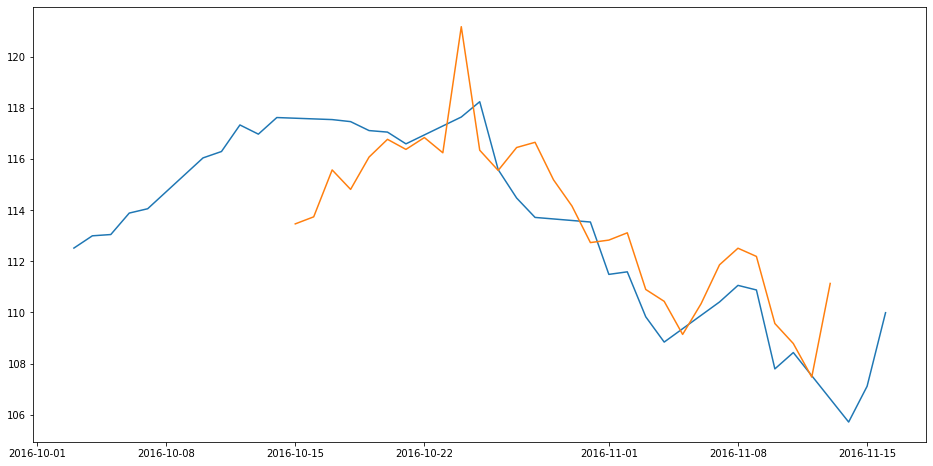

In [28]:
plt.figure(figsize=(16,8))
plt.plot(updated_df['close'], label='Close Price history')
plt.plot(Predict_df['forecast'], label='Close Price History')

### Moving Average

In [29]:
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [30]:
def get_preds_mov_avg(df, target_col, N, pred_min, offset):
    pred_list = df[target_col].rolling(window = N, min_periods=1).mean() # len(pred_list) = len(df)
    
    # Add one timestep to the predictions
    pred_list = np.concatenate((np.array([np.nan]), np.array(pred_list[:-1])))
    
    # If the values are < pred_min, set it to be pred_min
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
    
    return pred_list[offset:]

In [31]:
# Get sizes of each of the datasets
test_size = 0.3
cv_size = 0.2                   
Nmax = 20                       
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = df[:num_train]
cv = df[num_train:num_train+num_cv]
train_cv = df[:num_train+num_cv]
test = df[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 867
num_cv = 346
num_test = 519
train.shape = (867, 7)
cv.shape = (346, 7)
train_cv.shape = (1213, 7)
test.shape = (519, 7)


In [32]:
import math

RMSE = []
for N in range(1, Nmax+1): # N is no. of samples to use to predict the next value
    est_list = get_preds_mov_avg(train_cv, 'close', N, 0, num_train)
    
    cv.loc[:, 'est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['close'])))
print('RMSE = ' + str(RMSE))

RMSE = [1.136088279189026, 1.2839546832595412, 1.4554431352314419, 1.6231430114298284, 1.7827735125206432, 1.92100770378328, 2.040315560616955, 2.1485949348357147, 2.241591247173668, 2.3229061018343, 2.39712015136277, 2.4633364338484527, 2.5248889923917646, 2.5826417727925532, 2.6367962859935625, 2.69123504921246, 2.748888399331664, 2.80951021622602, 2.8711482209572567, 2.9342003326276815]


In [33]:
est_list = get_preds_mov_avg(df, 'close', 2, 0, num_train+num_cv)
test.loc[:, 'est' + '_N' + '2'] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['close'])))
test.head()

RMSE = 1.985


,open,close,low,high,volume,label,date,est_N2
date,,,,,,,,
2014-10-28,105.400002,106.739998,105.349998,106.739998,48060900.0,111.949997,2014-10-28,105.165001
2014-10-29,106.650002,107.339996,106.360001,107.370003,52687900.0,111.620003,2014-10-29,105.925000
2014-10-30,106.959999,106.980003,105.900002,107.349998,40654800.0,109.730003,2014-10-30,107.039997
2014-10-31,108.010002,108.000000,107.209999,108.040001,44639300.0,108.230003,2014-10-31,107.160000
2014-11-03,108.220001,109.400002,108.010002,110.300003,52282600.0,106.750000,2014-11-03,107.490002


# Autoregression Model
As we were dealing with time-series data, we decided to make use of the autoregression model from the statsmodel library

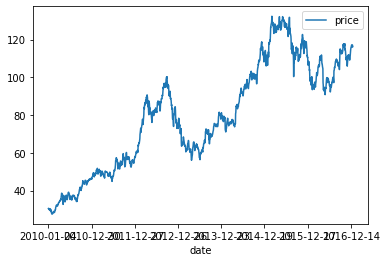

In [34]:
from parser import Parser
parser = Parser()
apple = parser.get("AAPL")
apple.plot()
split = int(apple.shape[0]*0.7)
train, test = apple.iloc[:split, :], apple.iloc[split:, :]

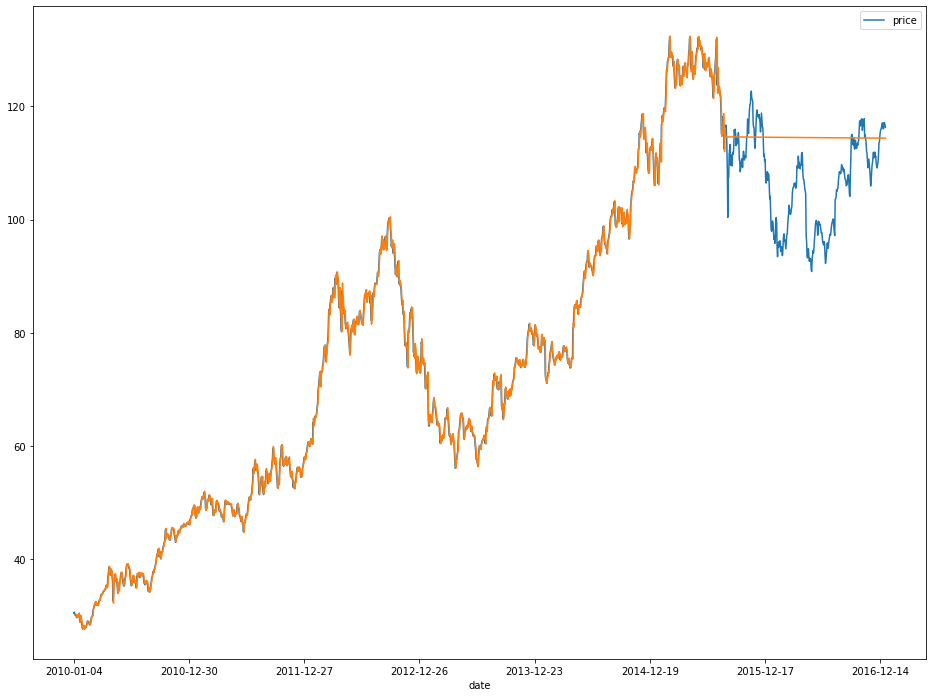

In [35]:
# !pip install statsmodels # on windows
# !pip3 install statsmodels # on mac

from statsmodels.tsa.ar_model import AutoReg

start = int(apple.shape[0]*0.8)

model = AutoReg(apple, lags=5).fit()
pred = model.predict(start=0, dynamic=start)

# pred = pd.Series([0 for i in range(start)]).append(pred)

apple.plot(figsize=(16,12))
pred.plot()

# ARIMA Model
We decided to try the ARIMA model also (another time-series prediction model) as the results from the autoregression were not fantastic

In [36]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(train, order=(1,1,1))
arima_model_fit = arima_model.fit(disp=0)

arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                 1232
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1696.760
Method:                       css-mle   S.D. of innovations              0.959
Date:                Wed, 06 May 2020   AIC                           3401.520
Time:                        19:34:57   BIC                           3421.985
Sample:                             1   HQIC                          3409.219
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0709      0.033      2.170      0.030       0.007       0.135
ar.L1.D.price    -0.0360      0.120     -0.301      0.764      -0.270       0.199
ma.L1.D.price     0.2392      0.115      2.073      0.038       0.013       0.465
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -27.8039           +0.0000j           27.8039            0.5000
MA.1           -4.1814           +0.0000j            4.1814            0.5000
-----------------------------------------------------------------------------
"""

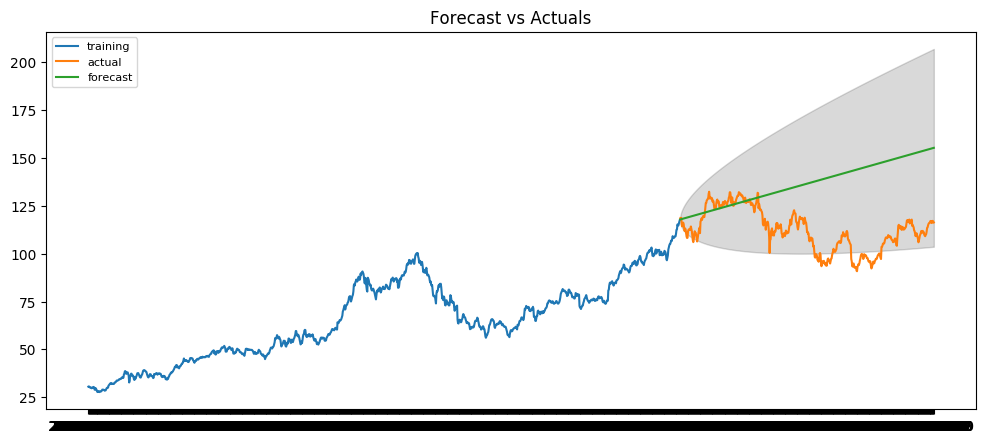

In [37]:
fc, se, conf = arima_model_fit.forecast(test.shape[0], alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Logistic Regression
Another model that we attempted was the logistic regression model as a time series predictor.
In this model, the independent variable was the the past N price columns, while the dependent variable was a binary variable representing whether the next price after the window was higher than its previous price. 

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

WINDOW = 50

x = []
y = []
for i in range(WINDOW, len(apple.values)):
    xv = apple["price"].values[i-WINDOW:i]
    yv = apple["price"].values[i]
    x.append(xv)
    
    if yv < xv[-1]:
        y.append(0)
    else:
        y.append(1)
    
x = pd.DataFrame(x)

Scalers = [
    ("standard scaler", StandardScaler),
    ("min max scaler", MinMaxScaler),
    ("robust scaler", RobustScaler),
    ("max ab scaler", MaxAbsScaler)
]

Models = [
    ("Naive bayes", BernoulliNB),
    ("logistic regresssion", LogisticRegression),
    ("decision tree", DecisionTreeClassifier),
    ("random forest", RandomForestClassifier),
    ("support vector machine", LinearSVC)
]

for scaler_name, Scaler in Scalers:

    print("="*100)
    print("scaler used:", scaler_name)
    print("="*100)
    print()
    
    for model_name, Model in Models:

        scaler = Scaler()
        x_scaled = scaler.fit_transform(x)
        x_train, x_test, y_train, y_test = train_test_split(x_scaled,y)


        model = Model()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        print(f"{model_name} accuracy score:", accuracy_score(y_pred, y_test))
        print(f"{model_name} precision score:", precision_score(y_pred, y_test))
        print(f"{model_name} recall score:", recall_score(y_pred, y_test))
        print(f"{model_name} f1 score:", f1_score(y_pred, y_test))
        print()




scaler used: standard scaler

Naive bayes accuracy score: 0.5070093457943925
Naive bayes precision score: 0.5191489361702127
Naive bayes recall score: 0.5545454545454546
Naive bayes f1 score: 0.5362637362637362

logistic regresssion accuracy score: 0.5420560747663551
logistic regresssion precision score: 0.8354978354978355
logistic regresssion recall score: 0.5498575498575499
logistic regresssion f1 score: 0.6632302405498282

decision tree accuracy score: 0.5957943925233645
decision tree precision score: 0.6134453781512605
decision tree recall score: 0.6431718061674009
decision tree f1 score: 0.6279569892473118

random forest accuracy score: 0.5677570093457944
random forest precision score: 0.6787330316742082
random forest recall score: 0.5681818181818182
random forest f1 score: 0.618556701030928

support vector machine accuracy score: 0.544392523364486
support vector machine precision score: 0.726890756302521
support vector machine recall score: 0.570957095709571
support vector machin

<h2>Improving our models</h2>
<br>
After evaluating our models and data, we believe that there are a few ways we may potentially improve the performance of our models.

### Introducing more features

Based on the datasets provided on kaggle, we are given some fundamental indicators relating to each stock. We decided to combine the fundamentals dataset with the stock price datasets to introduce more features into our machine learning models

In [39]:
df = pd.read_csv('data/prices-split-adjusted.csv')
df3 = df3.rename(columns={'Ticker Symbol':'symbol', 'Period Ending':'date'})
df4 = pd.merge(df, df3, how='left', on=['date','symbol'])

### Feature engineering

We have decided to take sector information from our securities dataset to add it into our main dataset. Since sector data is categorical, we have to encode it into continuous variables

In [40]:
df2['GICS Sector'] = df2['GICS Sector'].astype('category')
cat_columns = df2.select_dtypes(['category']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)
df2 = df2.rename(columns={'Ticker symbol':'symbol'})
#combining it to the main dataset
tempdf = df2[['symbol','GICS Sector']]
df4 = pd.merge(df4, tempdf['symbol'], how='inner', on=['symbol'])

### Normalisation

Since the data consist of features with varying scales, we decided to apply normalisation to ensure that the model is not affected by extreme values. We decided to apply min max normalization to our problem

In [41]:
from sklearn import preprocessing

x = df4.iloc[:,2:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df4_scaled = pd.DataFrame(x_scaled)
df4_scaled = pd.concat([df4.iloc[:,:2], df4_scaled], axis=1)
df4_scaled.columns = df4.columns
df4_scaled

,date,symbol,open,close,low,high,volume,Unnamed: 0,Accounts Payable,Accounts Receivable,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,2016-01-05,WLTW,0.076934,0.078812,0.078020,0.077818,0.002517,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-06,WLTW,0.078078,0.075095,0.076490,0.077374,0.002776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-07,WLTW,0.072480,0.071904,0.073254,0.073747,0.002896,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-08,WLTW,0.071911,0.072964,0.072331,0.072309,0.002334,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-11,WLTW,0.072878,0.071917,0.072712,0.072240,0.001639,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-23,FTV,0.033277,0.033567,0.033757,0.033112,0.000595,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851260,2016-12-27,FTV,0.033542,0.033535,0.033976,0.033162,0.000449,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851261,2016-12-28,FTV,0.033485,0.033085,0.033563,0.033049,0.000629,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851262,2016-12-29,FTV,0.033062,0.033250,0.033640,0.032724,0.000558,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Re-evaluating our models</h2>

In this section, we are going to re-evaluate 2 models that we have identified using the new and improved dataset. We have identified 2 models (Linear regression & Genetic Algorithm) to further improve on due to the high accuracy score (For Linear Regression) shown. We decided to explore Genetic Algorithm further as the results shown seems to show profitability from trading

### Linear regression

In [42]:
from sklearn.datasets import load_boston


In [43]:
# Creating new column 
num = 30 # forcasting 30 days ahead
df4_scaled['label'] = df4_scaled['close'].shift(-num) # forcasting close column
                                     
print(df4_scaled.shape)

(851264, 85)


In [44]:
df = df4_scaled.loc[df4_scaled['symbol']=='AAPL']
df.drop('symbol', axis=1, inplace=True)
Data = df.drop(['label',"date"],axis=1)
X = Data.values
X = preprocessing.scale(X)
# X = X[:-num]

Target = df.label
y = Target.values
print(np.shape(X), np.shape(y))
X = np.nan_to_num(X)

(1762, 82) (1762,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test , y_test) #Returns the coefficient of determination R^2 of the prediction


0.8260275646697111

In [46]:
# Prediction 

X_Predict = X[-num:]
Forecast = lr.predict(X_Predict)
print(Forecast)

[0.06664578 0.06529102 0.06724396 0.06675377 0.06706442 0.06676363
 0.06616696 0.06754306 0.06714992 0.06664254 0.06586866 0.0668537
 0.06577811 0.06692868 0.06746814 0.06845496 0.06886467 0.0687776
 0.0680108  0.06843452 0.06861294 0.06931923 0.06891282 0.068749
 0.06915167 0.0690156  0.06956743 0.07066455 0.06886026 0.06982092]


In [47]:
Date = np.array(df.index) 
last_Date = Date[len(Date)-1]
print(last_Date)

7298


In [48]:
# creating timeserie from the last date

trange = pd.date_range('2016-10-15', periods=num, freq='d')
trange

DatetimeIndex(['2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18',
               '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22',
               '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26',
               '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30',
               '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03',
               '2016-11-04', '2016-11-05', '2016-11-06', '2016-11-07',
               '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-11',
               '2016-11-12', '2016-11-13'],
              dtype='datetime64[ns]', freq='D')

In [49]:
# Adding the predicted values to dateframe
Predict_df = pd.DataFrame(Forecast, index=trange)
Predict_df.columns = ['forecast']
Predict_df

,forecast
2016-10-15,0.066646
2016-10-16,0.065291
2016-10-17,0.067244
2016-10-18,0.066754
2016-10-19,0.067064
2016-10-20,0.066764
2016-10-21,0.066167
2016-10-22,0.067543
2016-10-23,0.067150
2016-10-24,0.066643


In [50]:
preds = lr.predict(X_test)
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rmse

0.007575468896695127

In [51]:
#plot
df['date'] = df.index
df['date'] = pd.to_datetime(df['date'])
mask = (df['date'] > '2016-10')
updated_df = df.loc[mask]
updated_df

,date,open,close,low,high,volume,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,...,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding,label


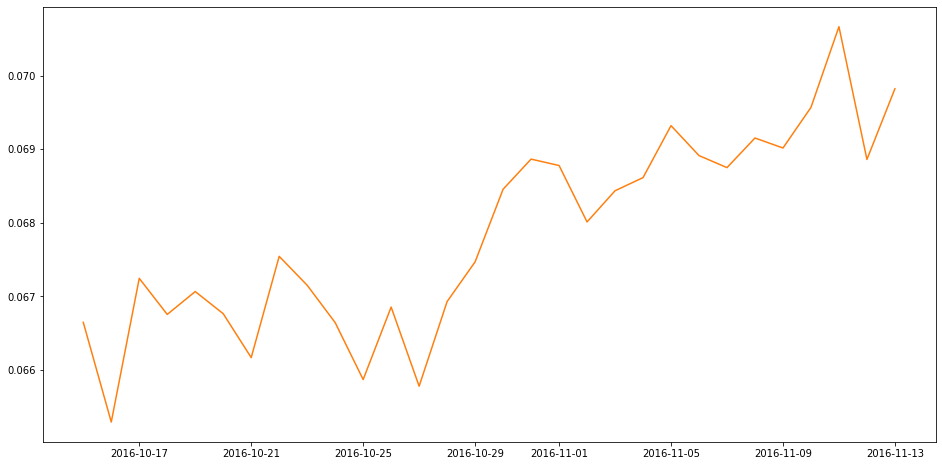

In [52]:
plt.figure(figsize=(16,8))
plt.plot(updated_df['close'], label='Close Price history')
plt.plot(Predict_df['forecast'], label='Close Price History')

# Genetic Algorithm
We decided also to explore the use of the genetic algorithm learnt in class to teach a model to learn how to trade. Here's the general idea of what we tried to do

```
1. preprocess and clean the data
2. spawn N monkeys (agents)
3. randomly initialize the array representation of the monkeys
4. get the N monkeys to trade a pool of random stocks
5. sort the monkeys based on their percentage gains
6. pick the best n monkeys 
7. spawn more children monkeys from the best n monkeys (mutation + combination)
8. repeat steps 4 to 7 for i iterations

```

In [53]:
from genetic_helper.classes.Monkey import Monkey
from genetic_helper.classes.genetic import Genetic
from parser import Parser

In [80]:
parser = Parser()
gen = Genetic(num_monkeys=50, monkey_window_size=25, num_keep=2, num_iter=20)

import random
random.seed(6)

pool = parser.get_pool(n=4)

out = gen.run_pool(pool)

chosen: ['SE', 'WDC', 'PAYX', 'MSFT']
iteration 1: stats: {'high': 98.9825843971, 'average': -16.802581843893766, 'low': -106.52281808720001} 
iteration 2: stats: {'high': 98.9825843971, 'average': 66.96499935790848, 'low': -88.885198554925} 
iteration 3: stats: {'high': 99.1344432374375, 'average': 71.89093455166496, 'low': -3.492686098125006} 
iteration 4: stats: {'high': 99.27685190143751, 'average': 53.16319800681974, 'low': 0.0} 
iteration 5: stats: {'high': 102.95403170514999, 'average': 39.28556230698249, 'low': -91.54888202776249} 
iteration 6: stats: {'high': 102.95403170514999, 'average': 44.55150021351171, 'low': -107.37795514103749} 
iteration 7: stats: {'high': 102.95403170514999, 'average': 52.91614272013398, 'low': -91.26175550966249} 
iteration 8: stats: {'high': 102.95403170514999, 'average': 37.59712293497722, 'low': -111.183516466575} 
iteration 9: stats: {'high': 102.95403170514999, 'average': 48.226678377212735, 'low': -107.99118737013751} 
iteration 10: stats: {'h

In [83]:
monkey = gen.monkeys[0]
monkey.weights

[[0.984209584472732,
  0.13326307739599874,
  0.28882665136358304,
  0.21833446785218963,
  0.14879958454800973,
  -0.5536339842308865,
  0.021692942611509114,
  0.9696215958851004,
  1.1968080222317428,
  0.1641274401313576,
  -0.4216368260960676,
  0.43837872918792703,
  0.6941103641661699,
  0.38783133606651266,
  1.290392616782632,
  0.9896578546605123,
  0.3172850775008966,
  0.8709074657437441,
  0.6069435676824189,
  0.18171929566987344,
  0.03694132733160593,
  1.3924070602934524,
  1.1104767305851053,
  -0.26877422995723177,
  0.5030065974685844,
  0.7865466318153205],
 [0.6151960774485615,
  1.0653141490696325,
  0.49979496645828847,
  1.0777885462477812,
  0.4706313085422352,
  1.2218800701793329,
  0.6713701210821459,
  1.086035132660713,
  0.9485313010149792,
  0.9329295456166706,
  -0.21677565255937253,
  0.23248079862331417,
  0.1400918912512748,
  0.270916550861585,
  0.6406347068342111,
  0.5401203277937483,
  -0.336248522438275,
  -0.44496964509176373,
  0.51147748357

In [85]:
apple = parser.get("AAPL")

# this shows the returns the best monkey has from trading apple stock
monkey.trade(apple)

201.18897820022949

In [89]:
pool = parser.get_pool(n=20)
pool = {k:monkey.trade(df) for k,df in pool.items()}
# this shows the returns that the best monkey has made from trading the list of stocks stated below
pool

chosen: ['IR', 'EA', 'ALL', 'KIM', 'KR', 'NOC', 'YUM', 'COO', 'USB', 'TRIP', 'VRSK', 'ESS', 'SLB', 'HIG', 'NVDA', 'NWL', 'TAP', 'KMB', 'CELG', 'MLM']


{'IR': 156.06035755456332,
 'EA': 306.7452791589,
 'ALL': 118.30296608955004,
 'KIM': 66.40100332005001,
 'KR': 253.80626227462506,
 'NOC': 186.21670649999996,
 'YUM': 106.41683784773132,
 'COO': 348.2694805029,
 'USB': 96.18227999999998,
 'TRIP': -10.755550089599996,
 'VRSK': 138.50992660890003,
 'ESS': 138.24984112240003,
 'SLB': 3.5912812320000027,
 'HIG': 68.80767400000002,
 'NVDA': 790.3271185799498,
 'NWL': 164.73225294375,
 'TAP': 111.80322541129999,
 'KMB': 13.096950327312294,
 'CELG': 254.59183295399998,
 'MLM': 144.3233118227}